In [23]:
import os
import matplotlib.pyplot as plt

In [24]:
def Rebuild_All():
    print("===== Rebuilding Code =====")
    os.system("mkdir ./build/ && mkdir ./base/build/ && mkdir ./gpu_naive/build/")
    output = os.system("cd ./build/ && cmake -DCMAKE_BUILD_TYPE=Release ..")
    print(output)
    output = os.system("cd ./base/build/ && cmake -DCMAKE_BUILD_TYPE=Release ..")
    print(output)    
    output = os.system("cd ./gpu_naive/build/ && cmake -DCMAKE_BUILD_TYPE=Release ..")
    print(output)



In [25]:
Rebuild_All()

===== Rebuilding Code =====
-- Cray Programming Environment 2.7.20 C
-- Cray Programming Environment 2.7.20 CXX
-- Configuring done
-- Generating done
-- Build files have been written to: /global/u2/d/depetro1/ParallelComp/ScaleAI/build
0
-- Cray Programming Environment 2.7.20 C
-- Cray Programming Environment 2.7.20 CXX
-- Configuring done
-- Generating done
-- Build files have been written to: /global/u2/d/depetro1/ParallelComp/ScaleAI/base/build
0
-- Cray Programming Environment 2.7.20 C
-- Cray Programming Environment 2.7.20 CXX
-- Configuring done
-- Generating done
-- Build files have been written to: /global/u2/d/depetro1/ParallelComp/ScaleAI/gpu_naive/build
0


mkdir: cannot create directory ‘./build/’: File exists


In [26]:
import subprocess
def Test_Base(nlayer=1000, width=512, seed = 0):
    ret, val = subprocess.getstatusoutput(f"./base/build/base -n {nlayer} -w {width} -s {seed}")
    # print(f"Base[n={nlayer}, w={width}]:", val)
    return float(val)

In [27]:
def Test_GPU_Naive(nlayer=1000, width=512, NUM_THREADS = 32, seed = 0):
    ret, val = subprocess.getstatusoutput(f"./gpu_naive/build/gpu -n {nlayer} -w {width} -s {seed} -t {NUM_THREADS}")
    # print(f"GPU_Naive[n={nlayer}, w={width}]:", val)
    return float(val)

In [28]:
def Test_GPU(nlayer=1000, width=512, NUM_THREADS = 32, seed = 0):
    ret, val = subprocess.getstatusoutput(f"./build/gpu -n {nlayer} -w {width} -s {seed} -t {NUM_THREADS}")
    # print(f"GPU[n={nlayer}, w={width}]:", val)
    return float(val)

In [29]:
Test_Base(5000, 1024)
Test_GPU_Naive(5000, 1024)
Test_GPU(5000, 1024)

0.469707

In [30]:
import numpy as np
import matplotlib.pyplot as plt

Calculating width: 10
Calculating width: 100
Calculating width: 1000
Calculating width: 10000
Calculating width: 100000


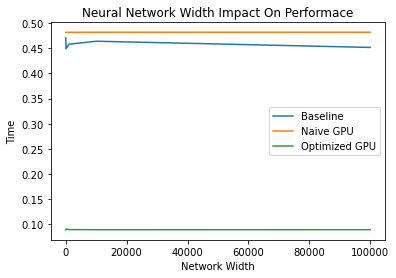

In [43]:
width_arr = [10, 100, 1000, 10000, 100000]
result_arr_Base = []
result_arr_GPU_Naive = []
result_arr_GPU = []

for width in width_arr:
    print("Calculating width:", width)
    result_arr_Base.append( Test_Base(1000, width) )
    result_arr_GPU_Naive.append( Test_GPU_Naive(1000, width, 1024) )
    result_arr_GPU.append(Test_GPU(1000, width, 1024))

x = np.array(width_arr)
fig, ax = plt.subplots()
ax.plot(x, result_arr_Base, label='Baseline')
ax.plot(x, result_arr_GPU_Naive, label='Naive GPU')
ax.plot(x, result_arr_GPU, label='Optimized GPU')

ax.set_xlabel('Network Width')
ax.set_ylabel('Time')
ax.set_title('Neural Network Width Impact On Performace')
ax.legend()
plt.show()

In [46]:
nlayer_arr = [10, 100, 1000, 10000, 100000, 1000000, 10000000]
result_arr_Base = []
result_arr_GPU_Naive = []
result_arr_GPU = []

for nlayer in nlayer_arr:
    print("Calculating nalyer:", nlayer)
    result_arr_Base.append( Test_Base(nlayer, 10000) )
    result_arr_GPU_Naive.append( Test_GPU_Naive(nlayer, 10000, 128) )
    result_arr_GPU.append(Test_GPU(nlayer, 10000, 128))

x = np.array(nlayer_arr)
fig, ax = plt.subplots()
ax.plot(x, result_arr_Base, label='Baseline')
ax.plot(x, result_arr_GPU_Naive, label='Naive GPU')
ax.plot(x, result_arr_GPU, label='Optimized GPU')

ax.set_xlabel('Network Layers')
ax.set_ylabel('Time')
ax.set_title('Neural Network Layer Count Performace Impact')
ax.legend()
plt.show()

Calculating nalyer: 10
Calculating nalyer: 100
Calculating nalyer: 1000
Calculating nalyer: 10000
Calculating nalyer: 100000
Calculating nalyer: 1000000


Calculating nalyer: 10
Calculating nalyer: 100
Calculating nalyer: 1000
Calculating nalyer: 10000


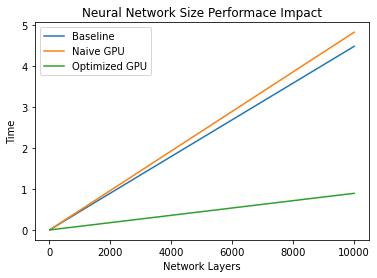

In [33]:
nlayer_arr = [10, 100, 1000, 10000]
result_arr_Base = []
result_arr_GPU_Naive = []
result_arr_GPU = []

for nlayer in nlayer_arr:
    print("Calculating nalyer:", nlayer)
    result_arr_Base.append( Test_Base(nlayer, nlayer_arr) )
    result_arr_GPU_Naive.append( Test_GPU_Naive(nlayer, nlayer_arr) )
    result_arr_GPU.append(Test_GPU(nlayer, nlayer_arr))

x = np.array(nlayer_arr)
fig, ax = plt.subplots()
ax.plot(x, result_arr_Base, label='Baseline')
ax.plot(x, result_arr_GPU_Naive, label='Naive GPU')
ax.plot(x, result_arr_GPU, label='Optimized GPU')

ax.set_xlabel('Network Layers')
ax.set_ylabel('Time')
ax.set_title('Neural Network Size Performace Impact')
ax.legend()
plt.show()